In [ ]:
# Tutorial followed : https://youtu.be/MO5n5JaRotc 

In [1]:
import pandas as pd

In [4]:
df  =  pd.read_csv('train_fake_news.csv')

In [5]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
# Dropping the dependent feature ie label 
X = df.drop('label',axis = 1)

In [7]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [8]:
y = df['label']

In [9]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [10]:
df.shape


(20800, 5)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [15]:
df = df.dropna()

In [17]:
df.shape

(18285, 5)

In [16]:
df.head(10)
## See here that 6th and 8th record have been dropped, thus we need to reset the index do that our for loop works efficiently

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [ ]:
## Copying in messages

In [23]:
 messages = df.copy()

In [24]:
# Reset the indices

In [25]:
messages.reset_index(inplace = True)

In [26]:
## Check one for confirmatio

In [27]:
messages['title'][7]

'A Back-Channel Plan for Ukraine and Russia, Courtesy of Trump Associates - The New York Times'

In [30]:
import re
from nltk.stem import WordNetLemmatizer

In [35]:
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [wordnet.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [36]:
corpus

['house dem aide even see comey letter jason chaffetz tweeted',
 'flynn hillary clinton big woman campus breitbart',
 'truth might get fired',
 'civilian killed single u airstrike identified',
 'iranian woman jailed fictional unpublished story woman stoned death adultery',
 'jackie mason hollywood would love trump bombed north korea lack trans bathroom exclusive video breitbart',
 'beno hamon win french socialist party presidential nomination new york time',
 'back channel plan ukraine russia courtesy trump associate new york time',
 'obama organizing action partner soros linked indivisible disrupt trump agenda',
 'bbc comedy sketch real housewife isi cause outrage',
 'russian researcher discover secret nazi military base treasure hunter arctic photo',
 'u official see link trump russia',
 'yes paid government troll social medium blog forum website',
 'major league soccer argentine find home success new york time',
 'well fargo chief abruptly step new york time',
 'anonymous donor pay 

In [38]:
## Apply CountVectorizer
## Bag of words model!
## What we are doing here is that we are taking the top 5000 frequently occuring words as features then applying 3-gram 
## and finally converting them into array (where trhe word is present 1 else 0)
cv =  CountVectorizer(max_features = 5000, ngram_range=(1,3))
x = cv.fit_transform(corpus).toarray()



In [39]:
x.shape

(18285, 5000)

In [40]:
y = messages['label']

In [43]:

## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [47]:
## get feature names from 4000 frequent words
cv.get_feature_names()[4000:]

# see the use of n-grams here (range - 1,3)
# sing - unigram
# smart meter - bigram
# smart meter case - trigram

['sing',
 'singer',
 'single',
 'sioux',
 'sister',
 'site',
 'sitting',
 'situation',
 'six',
 'size',
 'skip',
 'skipping',
 'sky',
 'slam',
 'slash',
 'slave',
 'slavery',
 'sleep',
 'slide',
 'slow',
 'slur',
 'small',
 'smart',
 'smart meter',
 'smart meter case',
 'smash',
 'smear',
 'smell',
 'smith',
 'smoking',
 'smoking gun',
 'smuggler',
 'snap',
 'snapchat',
 'snl',
 'snowden',
 'snowflake',
 'snub',
 'soar',
 'soccer',
 'social',
 'social medium',
 'socialist',
 'society',
 'soda',
 'software',
 'solar',
 'sold',
 'soldier',
 'solution',
 'somali',
 'somalia',
 'someone',
 'something',
 'sometimes',
 'son',
 'son law',
 'song',
 'soon',
 'soros',
 'soros funded',
 'sorry',
 'soul',
 'sound',
 'source',
 'south',
 'south africa',
 'south carolina',
 'south china',
 'south china sea',
 'south korea',
 'south korean',
 'southern',
 'space',
 'spacex',
 'spain',
 'spanish',
 'spark',
 'speak',
 'speaker',
 'speaker paul',
 'speaker paul ryan',
 'speaks',
 'special',
 'special 

In [48]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [49]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [51]:

count_df.head(10)

,abandon,abandoned,abc,abc news,abe,abedin,able,abortion,abroad,absolutely,...,zealand,zero,zika,zika virus,zionist,zone,zone new,zone new york,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
import matplotlib.pyplot as plt

In [62]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# MultinomialNB Algorithm

In [63]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()


In [64]:

from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.89760
Confusion matrix, without normalization


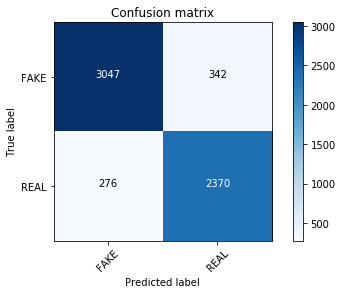

In [65]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.5f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [66]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8975973487986744

In [67]:
y_train.shape

(12250,)

# Multinomial Classifier with Hyperparameter

In [68]:
classifier=MultinomialNB(alpha=0.1)

In [69]:

previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8853355426677714
Alpha: 0.1, Score : 0.8979287489643745
Alpha: 0.2, Score : 0.8977630488815245
Alpha: 0.30000000000000004, Score : 0.8982601491300746
Alpha: 0.4, Score : 0.8980944490472246
Alpha: 0.5, Score : 0.8990886495443248
Alpha: 0.6000000000000001, Score : 0.8992543496271748
Alpha: 0.7000000000000001, Score : 0.899751449875725
Alpha: 0.8, Score : 0.8989229494614748
Alpha: 0.9, Score : 0.8979287489643745


In [70]:
feature_names = cv.get_feature_names()

In [71]:
classifier.coef_[0]

array([ -9.27039771,  -9.98952038,  -8.56451151, ..., -10.73673478,
        -8.85642192,  -9.27039771])

In [73]:

### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:40]
### Trump is real? XD

[(-3.943144093709331, 'trump'),
 (-4.22962292140461, 'hillary'),
 (-4.338139848022588, 'clinton'),
 (-4.954962989039901, 'election'),
 (-5.118348827858825, 'new'),
 (-5.185068022638484, 'comment'),
 (-5.220174743295261, 'video'),
 (-5.328566995079081, 'war'),
 (-5.353769941949475, 'hillary clinton'),
 (-5.358887660386455, 'fbi'),
 (-5.508005702816474, 'email'),
 (-5.519989069703571, 'world'),
 (-5.5757656071609825, 'obama'),
 (-5.676251682733973, 'donald'),
 (-5.704845482100714, 'donald trump'),
 (-5.72684050368626, 'russia'),
 (-5.787974892179628, 'day'),
 (-5.803860849768438, 'america'),
 (-5.844716204866502, 'american'),
 (-5.922745372543648, 'state'),
 (-5.9594804488689705, 'say'),
 (-5.987945368794788, 'vote'),
 (-6.017244339540406, 'breaking'),
 (-6.027204581245462, 'campaign'),
 (-6.047427717363505, 'wikileaks'),
 (-6.121614265716537, 'year'),
 (-6.121614265716537, 'news'),
 (-6.143862124380111, 'president'),
 (-6.155174462208838, 'get'),
 (-6.155174462208838, 'de'),
 (-6.166616

In [74]:

### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:20]

[(-10.736734782557797, 'abe'),
 (-10.736734782557797, 'abroad'),
 (-10.736734782557797, 'abuse new'),
 (-10.736734782557797, 'abuse new york'),
 (-10.736734782557797, 'accord'),
 (-10.736734782557797, 'act new'),
 (-10.736734782557797, 'act new york'),
 (-10.736734782557797, 'advice'),
 (-10.736734782557797, 'adviser new'),
 (-10.736734782557797, 'adviser new york'),
 (-10.736734782557797, 'affordable'),
 (-10.736734782557797, 'age new'),
 (-10.736734782557797, 'age new york'),
 (-10.736734782557797, 'agenda breitbart'),
 (-10.736734782557797, 'ailes'),
 (-10.736734782557797, 'aleppo new'),
 (-10.736734782557797, 'aleppo new york'),
 (-10.736734782557797, 'ali'),
 (-10.736734782557797, 'america breitbart'),
 (-10.736734782557797, 'america new york')]